<a href="https://colab.research.google.com/github/vitroid/hyperhomogeneity/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code generates a histogram of cumulative interactions from the coordinates of the quenched ice.

Only a limited number of configurations are included here.

This code is intended to be run on Google Colaboratory.

In [7]:
# Obtain the molecular coordinates of ices.
! rm -rf hyperhomogeneity
! apt install git-lfs
! git clone https://github.com/vitroid/hyperhomogeneity.git
! pip install yaplotlib vapory pairlist

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Cloning into 'hyperhomogeneity'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 0), reused 34 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [19]:
! cd hyperhomogeneity; git pull
! pip install yaplotlib vapory pairlist

remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/vitroid/hyperhomogeneity
   1e81299..3f96b25  main       -> origin/main
Updating 1e81299..3f96b25
Fast-forward
 .gitattributes           |    1 -
 q/1h-1000.q.nx3a         | 1028 ++++++++++++++++++++++++++++++++++++++++++++++
 q/2D2-1000.q.nx3a        | 1028 ++++++++++++++++++++++++++++++++++++++++++++++
 q/3-1000.q.nx3a          |  772 ++++++++++++++++++++++++++++++++++
 q/5-1000.q.nx3a          | 1012 +++++++++++++++++++++++++++++++++++++++++++++
 q/6-1000.q.nx3a          |  644 +++++++++++++++++++++++++++++
 q/7-1000.q.nx3a          | 1028 ++++++++++++++++++++++++++++++++++++++++++++++
 quenched/1h-1000.q.nx3a  |    3 -
 quenched/1h-1001.q.nx3a  |    3 -
 quenched/2D2-1000.q.nx3a |    3 -
 quenched/2D2-1001.q.nx3a |    3 -
 quenched/

/content/hyperhomogeneity/ice7analysis.py:394: RuntimeWarning: divide by zero encountered in double_scalars
  coulomb += charges[a]*charges[b] / L1
/content/hyperhomogeneity/ice7analysis.py:399: RuntimeWarning: divide by zero encountered in double_scalars
  LJ = AA/Q**6 - BB/Q**3
/content/hyperhomogeneity/ice7analysis.py:399: RuntimeWarning: invalid value encountered in double_scalars
  LJ = AA/Q**6 - BB/Q**3


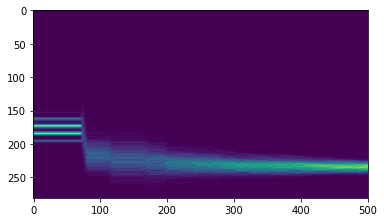

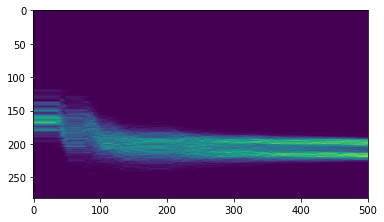

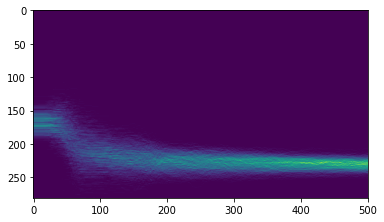

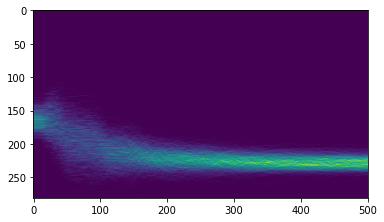

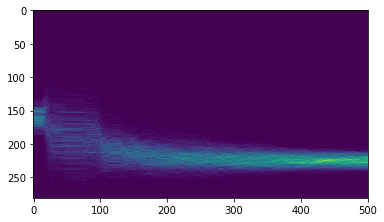

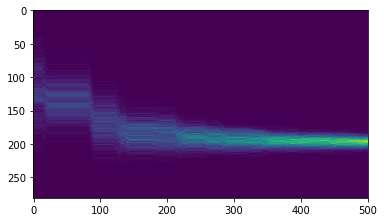

In [20]:
from hyperhomogeneity.ice7analysis import *
import glob

# Quenched
ices = ["1h", "2D2", "3", "5", "6", "7"]

linear = np.linspace(3, 13, 501)
values = np.linspace(-160,-20,281)
# print(linear)
H2 = dict()
for ice in ices:
    HH = np.zeros([linear.shape[0], values.shape[0]])
    for filename in glob.glob(f"hyperhomogeneity/q/{ice}-*.q.nx3a"):
        comeus, cell = load_nx3a(open(filename))
        cellmat = np.diag(cell)
        d_e = accum0(comeus, cellmat, range(len(comeus)), maxdist=13.2)
        for sf in steppify(d_e, linear):
            isf = ((sf+160)*2+0.5).astype(int)
            for i, v in enumerate(isf):
                if v < values.shape[0]:
                    HH[i,v] += 1
    print(ice)
    plt.imshow((HH.T)[::-1])
    plt.show()
    #plt.plot(HH[0])
    #plt.show()
    H2[ice] = HH, linear, values
    #print(HH)
    #assert False

import pickle
with open('H2.pickle', 'wb') as f:
    pickle.dump(H2, f)